<p style="font-size: 30px; color: white; text-align: center;">Installing Libraries</p>


In [9]:
!pip install tensorflow
!pip install keras

<p style="font-size: 30px; color: white; text-align: center;">Data Loading and Preprocessing</p>


In [10]:
import pandas as pd
import re

# Load the datasets
consumption_data = pd.read_csv('Cosumption_smart_meter_data.csv')
temperature_data = pd.read_csv('Temperature_data_pune.csv')

# Normalize date formats by replacing all `/` and `-` with `-`
consumption_data['Date'] = consumption_data['Date'].apply(lambda x: re.sub(r'[/-]', '-', x) if isinstance(x, str) else x)
temperature_data['Date'] = temperature_data['Date'].apply(lambda x: re.sub(r'[/-]', '-', x) if isinstance(x, str) else x)

#Parsing the Date column to datetime format
consumption_data['Date'] = pd.to_datetime(consumption_data['Date'], errors='coerce')
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'], errors='coerce')

#Checking for NaT values
print("Number of NaT values in consumption_data['Date']:", consumption_data['Date'].isna().sum())
print("Number of NaT values in temperature_data['Date']:", temperature_data['Date'].isna().sum())

# Filter and group consumption data for Pune city, combine daily consumption
pune_consumption = consumption_data[consumption_data['Region'] == 'Pune city']
pune_consumption_grouped = pune_consumption.groupby('Date')['Daily consumption (kWh)'].sum().reset_index()
pune_consumption_grouped.rename(columns={'Daily consumption (kWh)': 'Daily Consumption'}, inplace=True)

merged_data = pd.merge(pune_consumption_grouped, temperature_data[['Date', 'Rain', 'Temp Max', 'Temp Min']], on='Date', how='inner')

print(merged_data)


Number of NaT values in consumption_data['Date']: 0
Number of NaT values in temperature_data['Date']: 0
          Date  Daily Consumption      Rain   Temp Max   Temp Min
0   2018-01-01          53.880015  0.000000  28.784876  14.082322
1   2018-01-02          61.609968  0.000000  29.180910  13.775945
2   2018-01-03          76.390030  0.000000  29.429537  15.095621
3   2018-01-04          80.710030  0.000000  29.153131  15.457543
4   2018-01-05          85.649975  0.000000  28.661739  15.502247
..         ...                ...       ...        ...        ...
907 2020-06-26         198.689110  1.118230  31.075874  24.635406
908 2020-06-27         199.621568  0.150531  31.529629  24.166248
909 2020-06-28         211.330121  0.110519  31.279238  23.760080
910 2020-06-29         212.340758  0.000000  30.669489  23.659037
911 2020-06-30         208.100646  2.978964  29.967415  23.296806

[912 rows x 5 columns]


<p style="font-size: 30px; color: white; text-align: center;">Merging and Cleaning Temperature and Consumption Data</p>


In [11]:
# Merging temperature data with consumption data on Date
merged_data['Temp Avg'] = (merged_data['Temp Min'] + merged_data['Temp Max']) / 2
print(merged_data)

# Set Date as the index and sort by Date
merged_data.set_index('Date', inplace=True)
merged_data.sort_index(inplace=True)

# Handle missing values
merged_data = merged_data.dropna()

df = pd.DataFrame(merged_data)
df.to_csv("merged_data.csv")

          Date  Daily Consumption      Rain   Temp Max   Temp Min   Temp Avg
0   2018-01-01          53.880015  0.000000  28.784876  14.082322  21.433599
1   2018-01-02          61.609968  0.000000  29.180910  13.775945  21.478427
2   2018-01-03          76.390030  0.000000  29.429537  15.095621  22.262579
3   2018-01-04          80.710030  0.000000  29.153131  15.457543  22.305337
4   2018-01-05          85.649975  0.000000  28.661739  15.502247  22.081993
..         ...                ...       ...        ...        ...        ...
907 2020-06-26         198.689110  1.118230  31.075874  24.635406  27.855640
908 2020-06-27         199.621568  0.150531  31.529629  24.166248  27.847939
909 2020-06-28         211.330121  0.110519  31.279238  23.760080  27.519659
910 2020-06-29         212.340758  0.000000  30.669489  23.659037  27.164263
911 2020-06-30         208.100646  2.978964  29.967415  23.296806  26.632111

[912 rows x 6 columns]


<p style="font-size: 30px; color: white; text-align: center;">LSTM Model for non-linearity</p>


Epoch 1/50


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1365 - val_loss: 0.0075
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0199 - val_loss: 0.0022
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0151 - val_loss: 0.0019
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0126 - val_loss: 0.0018
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0133 - val_loss: 0.0017
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0126 - val_loss: 0.0017
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0123 - val_loss: 0.0016
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0109 - val_loss: 0.0016
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0107 - val_loss: 0.0022
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0106 - val_loss: 0.0015
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0111 - val_loss: 0.0016
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0104 - val_l

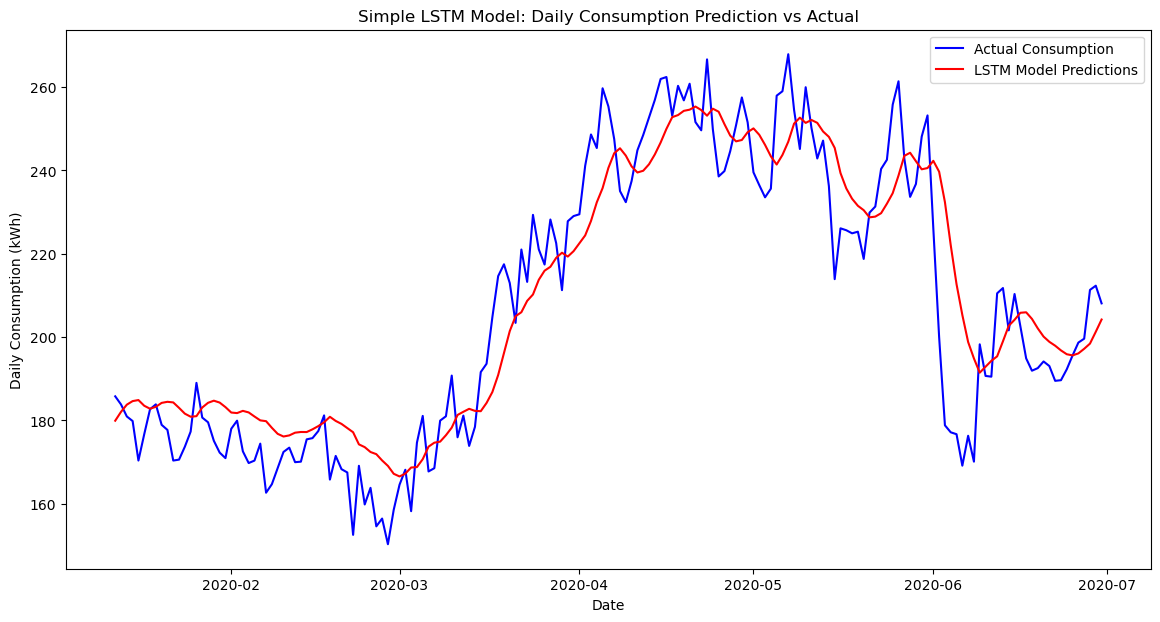

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(30)
tf.random.set_seed(30)

# Load and preprocess the data
merged_data = pd.read_csv('merged_data.csv')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)
y = merged_data['Daily Consumption']

# Adding Lagged Consumption Features
for lag in range(1, 4):
    merged_data[f'Lag_{lag}'] = merged_data['Daily Consumption'].shift(lag)

merged_data.dropna(inplace=True)

# Scaling the data for LSTM model
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Preparing data for LSTM model
sequence_length = 60
X, y_seq = [], []
for i in range(sequence_length, len(y_scaled)):
    X.append(y_scaled[i-sequence_length:i])
    y_seq.append(y_scaled[i, 0])

X, y_seq = np.array(X), np.array(y_seq)

# Splitting data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Final Dense layer for output
])

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training LSTM model
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# load weights, if already trained
model.load_weights('Best_with_85_Lstm.weights.h5')

# Make predictions
predictions_scaled = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions_scaled)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)
r_squared = r2_score(actual_values, predicted_values)

print(f"Final RMSE: {rmse}")
print(f"Final MAE: {mae}")
print(f"Final R-squared: {r_squared}")

# Plotting results
test_dates = merged_data.index[-len(y_test):]
plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual_values, label='Actual Consumption', color='blue')
plt.plot(test_dates, predicted_values, label='LSTM Model Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (kWh)')
plt.title('Simple LSTM Model: Daily Consumption Prediction vs Actual')
plt.legend()
plt.show()


<p style="font-size: 30px; color: white; text-align: center;">Saving model weights</p>


In [14]:
model.save_weights('Best_with_85_Lstm.weights.h5')

<p style="font-size: 30px; color: white; text-align: center;">ARIMA Model for seasonality and trends</p>


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Final RMSE: 10.556247213215396
Final MAE: 8.179488002170087
Final R-squared: 0.8310680586528272


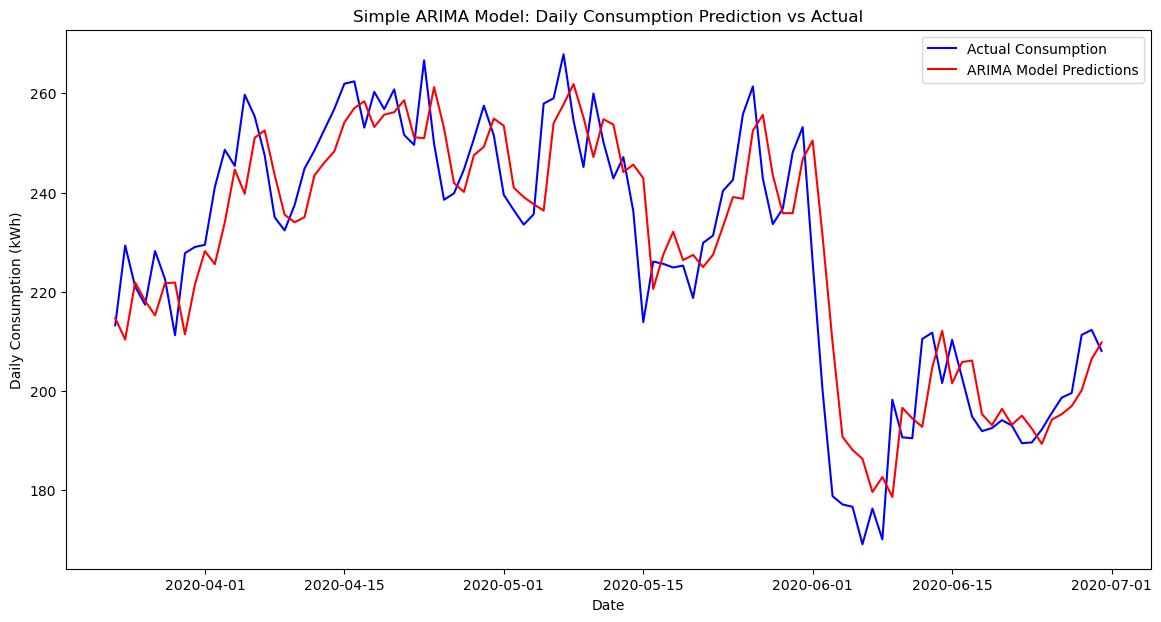

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess the data
merged_data = pd.read_csv('merged_data.csv')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)
y = merged_data['Daily Consumption']

# Define the ARIMA order
best_order = (3, 1, 3)

# ARIMA model
arima_model = ARIMA(y, order=best_order)
arima_model_fit = arima_model.fit()

# Make predictions on the test set
predictions = arima_model_fit.predict(start=len(y) - 100, end=len(y) - 1, dynamic=False)

# Actual values 
actual_values = y[-100:]

# Evaluate the ARIMA model
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
mae = mean_absolute_error(actual_values, predictions)
r_squared = r2_score(actual_values, predictions)

print(f"Final RMSE: {rmse}")
print(f"Final MAE: {mae}")
print(f"Final R-squared: {r_squared}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual_values.index, actual_values, label='Actual Consumption', color='blue')
plt.plot(actual_values.index, predictions, label='ARIMA Model Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (kWh)')
plt.title('Simple ARIMA Model: Daily Consumption Prediction vs Actual')
plt.legend()
plt.show()


<p style="font-size: 30px; color: white; text-align: center;">Saving model weights</p>


In [ ]:
# from joblib import dump, load

# dump(arima_model_fit, 'Best_ARIMA_with83.joblib')

['Best_ARIMA_with83.joblib']

<p style="font-size: 30px; color: white; text-align: center;">Hybrid LSTM+ARIMA Model for seasonality, non-linearity and trends</p>


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/50


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1477 - val_loss: 0.0124
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0131 - val_loss: 0.0011
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0081 - val_loss: 7.0579e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0074 - val_loss: 4.8176e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050 - val_loss: 6.4569e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0062 - val_loss: 9.1525e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0062 - val_loss: 8.6003e-04
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - val_loss: 4.5235e-04
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0049 - val_loss: 5.4159e-04
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0082 - val_loss: 4.9803e-04
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0077 - val_loss: 4.9102e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━

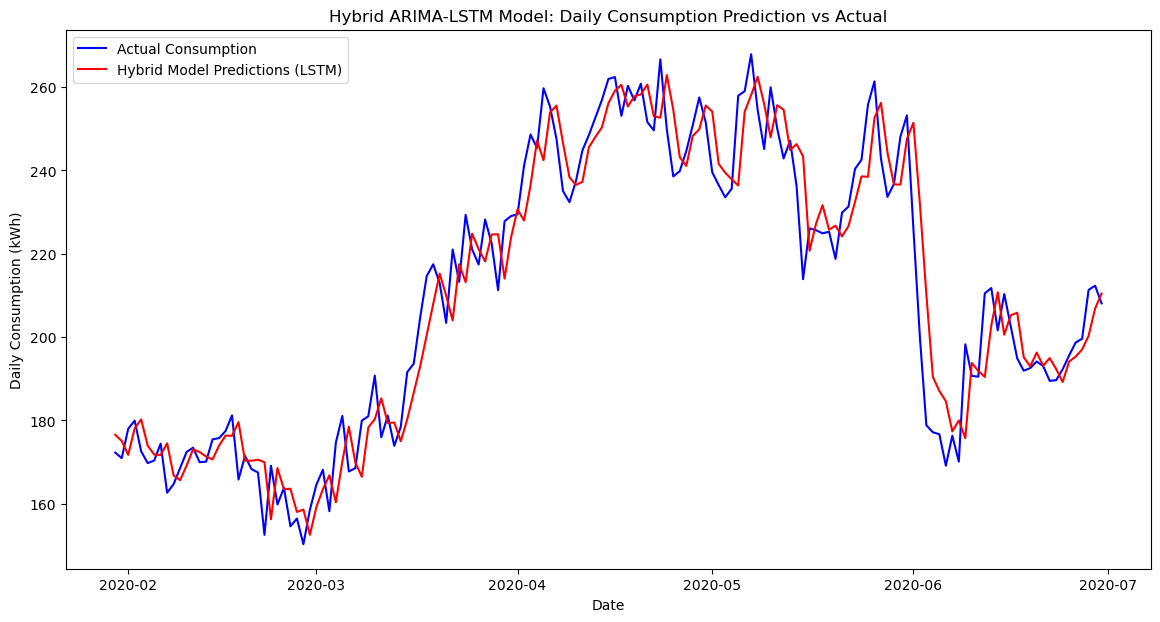

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(30)
tf.random.set_seed(30)

# Loading and preprocessing the data
merged_data = pd.read_csv('merged_data.csv')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)
y = merged_data['Daily Consumption']

# Adding Lagged Consumption Features
for lag in range(1, 4):
    merged_data[f'Lag_{lag}'] = merged_data['Daily Consumption'].shift(lag)

merged_data.dropna(inplace=True)

# ARIMA model
best_order = (3, 1, 3)
arima_model = ARIMA(y, order=best_order).fit()
arima_predictions = arima_model.predict(start=0, end=len(y)-1)

# Calculating residuals for LSTM
residuals = y - arima_predictions
residuals.dropna(inplace=True)

# Scaling the residuals for LSTM model
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(residuals.values.reshape(-1, 1))

# Preparing data for LSTM model
sequence_length = 30
batch_size = 32

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
train_size = int(0.8 * len(y_scaled))
train_gen = TimeseriesGenerator(y_scaled[:train_size], y_scaled[:train_size],
                                length=sequence_length, batch_size=batch_size)
test_gen = TimeseriesGenerator(y_scaled[train_size:], y_scaled[train_size:],
                               length=sequence_length, batch_size=batch_size)

# LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),  
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  
])

# Compiling model 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training LSTM model
#history = model.fit(train_gen, validation_data=test_gen, epochs=50, verbose=1)

# load weights, if already trained
model.load_weights('Best_with_91_Lstm.weights.h5')

# Predicting residuals with LSTM model
lstm_predictions_scaled = model.predict(test_gen)
lstm_predictions = target_scaler.inverse_transform(lstm_predictions_scaled)

# Adjusting ARIMA predictions length to match LSTM output
arima_adjusted = arima_predictions[-len(lstm_predictions):]

# Combining ARIMA and LSTM predictions
final_predictions = arima_adjusted + lstm_predictions.flatten()
actual_values = y[-len(final_predictions):]

# Evaluating the final model
rmse = np.sqrt(mean_squared_error(actual_values, final_predictions))
r_squared = r2_score(actual_values, final_predictions)
mae = mean_absolute_error(actual_values, final_predictions)

print(f"Final RMSE: {rmse}")
print(f"Final MAE: {mae}")
print(f"Final R-squared: {r_squared}")

# Plotting results
plt.figure(figsize=(14, 7))
plt.plot(actual_values.index, actual_values, label='Actual Consumption', color='blue')
plt.plot(actual_values.index, final_predictions, label='Hybrid Model Predictions (LSTM)', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (kWh)')
plt.title('Hybrid ARIMA-LSTM Model: Daily Consumption Prediction vs Actual')
plt.legend()
plt.show()


In [ ]:
# model.save_weights('Best_with_91_Lstm.weights.h5')

<p style="font-size: 30px; color: white; text-align: center;">Hybrid GRU+ARIMA Model for seasonality, non-linearity and trends</p>


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model in

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002221B50BB00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Final RMSE: 10.11554025181549
Final MAE: 7.912272821745756
Final R-squared: 0.9101314482943499


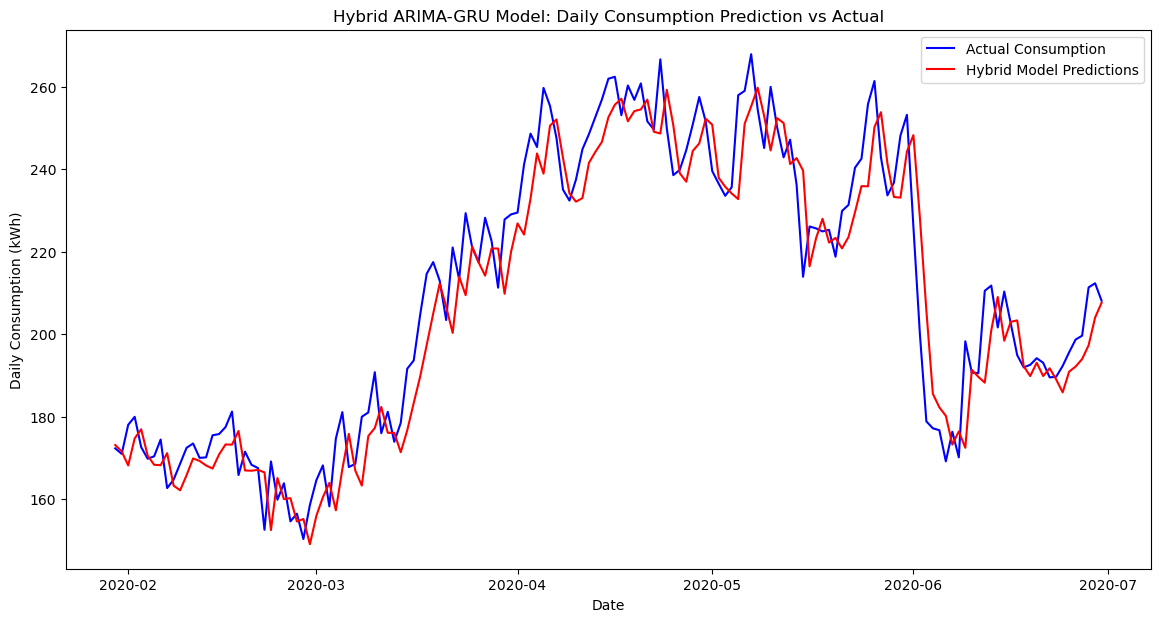

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(30)
tf.random.set_seed(30)

# Load and preprocess the data
merged_data = pd.read_csv('merged_data.csv')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)
y = merged_data['Daily Consumption']

# Adding Lagged Consumption Features (optional, adjust if needed)
for lag in range(1, 4):
    merged_data[f'Lag_{lag}'] = merged_data['Daily Consumption'].shift(lag)

merged_data.dropna(inplace=True)

# Prepare ARIMA model
best_order = (3, 1, 3)
arima_model = ARIMA(y, order=best_order).fit()
arima_predictions = arima_model.predict(start=0, end=len(y)-1)

# Calculate residuals for GRU model
residuals = y - arima_predictions
residuals.dropna(inplace=True)

# Scale the residuals for GRU model
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare data for GRU model
sequence_length = 30
batch_size = 32

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
train_size = int(0.8 * len(y_scaled))
train_gen = TimeseriesGenerator(y_scaled[:train_size], y_scaled[:train_size],
                                length=sequence_length, batch_size=batch_size)
test_gen = TimeseriesGenerator(y_scaled[train_size:], y_scaled[train_size:],
                               length=sequence_length, batch_size=batch_size)

# Define GRU model with optimal parameters
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile model with optimal learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

#Uncomment to Train GRU model
#history = model.fit(train_gen, validation_data=test_gen, epochs=50, verbose=1)

# Load weights if already trained, 
model.load_weights('Best_with_91_GRU.weights.h5')

# Predict residuals with GRU model
gru_predictions_scaled = model.predict(test_gen)
gru_predictions = target_scaler.inverse_transform(gru_predictions_scaled)

# Adjust ARIMA predictions length to match GRU output
arima_adjusted = arima_predictions[-len(gru_predictions):]

# Combine ARIMA and GRU predictions
final_predictions = arima_adjusted + gru_predictions.flatten()
actual_values = y[-len(final_predictions):]

# Evaluate the final model
rmse = np.sqrt(mean_squared_error(actual_values, final_predictions))
r_squared = r2_score(actual_values, final_predictions)
mae = mean_absolute_error(actual_values, final_predictions)

print(f"Final RMSE: {rmse}")
print(f"Final MAE: {mae}")  # Print MAE
print(f"Final R-squared: {r_squared}")

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual_values.index, actual_values, label='Actual Consumption', color='blue')
plt.plot(actual_values.index, final_predictions, label='Hybrid Model Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Consumption (kWh)')
plt.title('Hybrid ARIMA-GRU Model: Daily Consumption Prediction vs Actual')
plt.legend()
plt.show()


In [ ]:
#model.save_weights('Best_with_91_GRU.weights.h5')